[*********************100%***********************]  1 of 1 completed


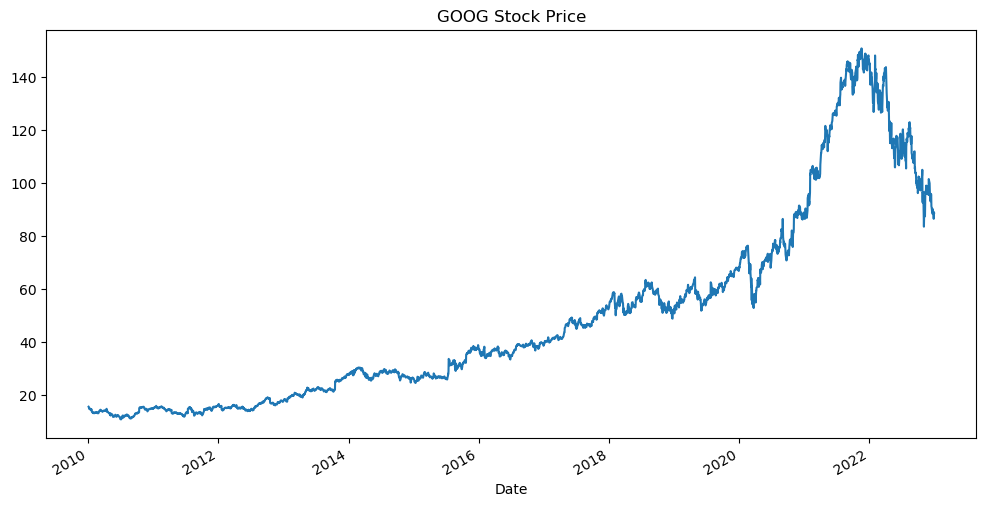

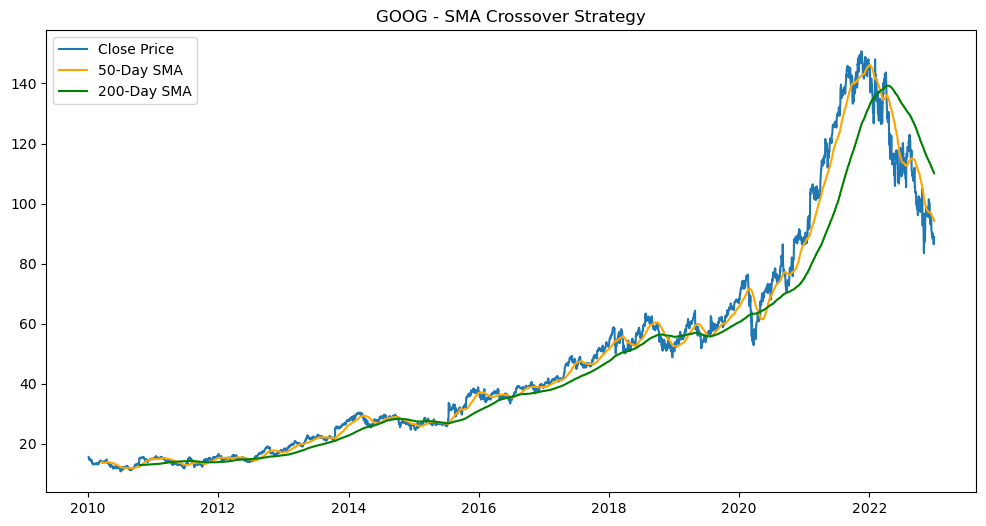

C:\Users\HP\AppData\Local\Temp\ipykernel_13092\2278654300.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = [1 if data['SMA_50'].iloc[i] > data['SMA_200'].iloc[i] else -1 for i in range(50, len(data))]
C:\Users\HP\Ap

<Figure size 1200x600 with 0 Axes>

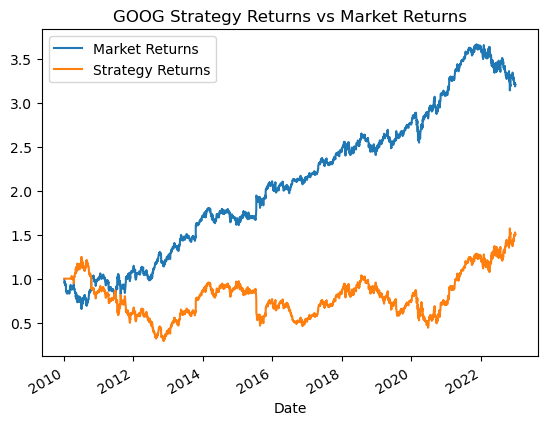

Strategy Final Value: 1.0253172238085069
Market Final Value: 5.684089986866249


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download stock data (e.g., Apple)
ticker = 'GOOG'
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")
data['Close'].plot(title=f'{ticker} Stock Price', figsize=(12, 6))
plt.show()

# Step 2: Calculate Moving Averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Plot the moving averages along with closing price
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-Day SMA', color='green')
plt.title(f'{ticker} - SMA Crossover Strategy')
plt.legend(loc='upper left')
plt.show()

# Step 3: Implement Buy/Sell logic
data['Signal'] = 0  # No position initially
data['Signal'][50:] = [1 if data['SMA_50'].iloc[i] > data['SMA_200'].iloc[i] else -1 for i in range(50, len(data))]
data['Position'] = data['Signal'].shift()  # Lag the signal to avoid lookahead bias

# Step 4: Backtest the strategy
# Create a column to store daily returns
data['Market Returns'] = data['Close'].pct_change()

# Create another column to store strategy returns
data['Strategy Returns'] = data['Market Returns'] * data['Position']

# Plot the cumulative returns of both buy-and-hold and the strategy
plt.figure(figsize=(12,6))
(1 + data[['Market Returns', 'Strategy Returns']].cumsum()).plot()
plt.title(f'{ticker} Strategy Returns vs Market Returns')
plt.show()

# Step 5: Evaluate performance (final portfolio values)
final_strategy_value = (1 + data['Strategy Returns'].dropna()).prod()
final_market_value = (1 + data['Market Returns'].dropna()).prod()
print(f'Strategy Final Value: {final_strategy_value}')
print(f'Market Final Value: {final_market_value}')
